In [1]:
import pandas as pd
import numpy as np
import datetime

## Sales Analysis

### Task 1 Merging in 12 MONTHS OF DATA AND SAVING

In [80]:
months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'November', 'October', 'December']
frames=[]
for month in months:
    df=pd.read_csv(f"Sales_{month}_2019.csv")
    frames.append(df)
all_data=pd.concat(frames, ignore_index=True)

all_data.to_csv('all_data.csv', index=False)
    

### Reading merged dataset

In [5]:
df=pd.read_csv('all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### DATA CLEANING

In [10]:
df.dropna(how='all', inplace=True)
df['Quantity Ordered']=pd.to_numeric(df['Quantity Ordered'])
df['Price Each']=pd.to_numeric(df['Price Each'], errors='coerce')

### 1. Best month of sales

#### Making New column for each month and converting to numeric type and filtering out where month is 'or' not numeric

In [11]:
df['Month']=df['Order Date'].str[:2]
or_for_month=df[df['Month']=='Or']
df=df[df['Month']!='Or']
df['Month']=df['Month'].astype('int64')
df['Month'].dtype

dtype('int64')

#### Making a new column for sales from quantity ordered and price each

In [12]:
df['Sales']=df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


#### Grouping the data based on the month column

In [14]:
grouped=df.groupby('Month')

#### Sum by group and find maximum

In [15]:
Monthly_Sales=grouped.sum()
Monthly_Sales['Sales']

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

#### ploting the monthly sales

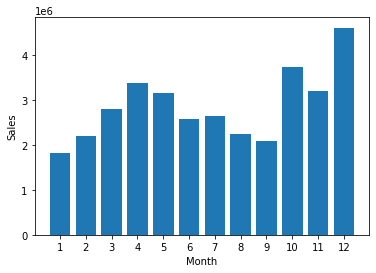

In [16]:
import matplotlib.pyplot as plt

months=range(1, 13)
plt.bar(months, Monthly_Sales['Sales'])
plt.ylabel('Sales')
plt.xlabel('Month')
plt.xticks(months)
plt.show()

### 2. City with highest Number of Sales (Using the apply method not grouping now)

#### Creating a new column for city from the Purchase Address column

In [17]:
def get_city(address):
    return address.split(',')[1] 
def get_state(address):
    return address.split(',')[2].split()[0]

df['City']=df['Purchase Address'].apply(lambda x:get_city(x)+" "+get_state(x))

df.City

0                 Boston MA
1               Portland OR
2          San Francisco CA
3            Los Angeles CA
4                 Austin TX
                ...        
186845     San Francisco CA
186846       Los Angeles CA
186847           Seattle WA
186848            Dallas TX
186849       Los Angeles CA
Name: City, Length: 185950, dtype: object

In [18]:
city_grouped=df.groupby('City').sum()
city_grouped['Sales']

City
 Atlanta GA          2.795499e+06
 Austin TX           1.819582e+06
 Boston MA           3.661642e+06
 Dallas TX           2.767975e+06
 Los Angeles CA      5.452571e+06
 New York City NY    4.664317e+06
 Portland ME         4.497583e+05
 Portland OR         1.870732e+06
 San Francisco CA    8.262204e+06
 Seattle WA          2.747755e+06
Name: Sales, dtype: float64

#### ploting the sales by city

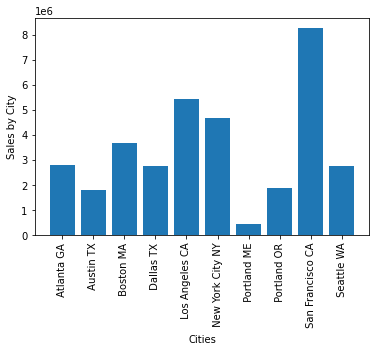

In [19]:
city=df['City'].unique()
plt.bar(sorted(city), city_grouped['Sales'])
#city=[cit for cit, df in df.groupby('City')] //keith's way
#plt.bar(city, city_grouped['Sales']) // keith's way
plt.ylabel('Sales by City')
plt.xlabel('Cities')
plt.xticks(city,rotation='vertical')
plt.show()

### 3. Time to display advertisements

#### converting the Order Date variable to datetime object

In [20]:
df['Order Date']=pd.to_datetime(df['Order Date'])

#### creating a variable for the hours of sale from the Order Date column

In [21]:
df['hours']=df['Order Date'].dt.hour
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hours
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX,11
...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco CA,20
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles CA,12
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle WA,6
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,Dallas TX,10


#### grouping by hour then plotting

In [22]:
hour_grouped=df.groupby('hours').count()

#### ploting the number of transaction by hour of transaction

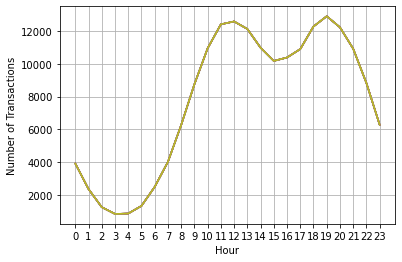

In [23]:
hours=[hour for hour, df in df.groupby('hours')]
plt.plot(hours, hour_grouped)
plt.ylabel('Number of Transactions')
plt.xlabel('Hour')
plt.xticks(hours)
plt.grid()
plt.show()

### 4. Products Sold together

In [90]:

sold_togeth=df[df['Order ID'].duplicated(keep=False)]
group=sold_togeth.groupby('Order ID')['Product']
new=group.transform(lambda x: str(','.join(x)))
ok=pd.DataFrame(new)
ok['cou']=1
Final=ok.groupby('Product').sum()
Final.sort_values('cou', ascending = False)


,cou
Product,
"iPhone,Lightning Charging Cable",1764
"Google Phone,USB-C Charging Cable",1712
"iPhone,Wired Headphones",722
"Vareebadd Phone,USB-C Charging Cable",624
"Google Phone,Wired Headphones",606
...,...
"iPhone,27in FHD Monitor",2
"LG Dryer,Lightning Charging Cable",2
"LG Dryer,Google Phone",2


looks like iphone and lighthning charging table are the most sold together.

### 5. What product sold the most?

In [102]:
sold_most=df.groupby('Product').sum()
sold_most.sort_values('Quantity Ordered', ascending=False)


,Quantity Ordered,Price Each,Month,Sales,hours
Product,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
USB-C Charging Cable,23975,261740.85,154819,286501.25,314645
Lightning Charging Cable,23217,323787.10,153092,347094.15,312529
Wired Headphones,20557,226395.18,133397,246478.43,271720
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
iPhone,6849,4789400.00,47941,4794300.00,98657


#### ploting most sold

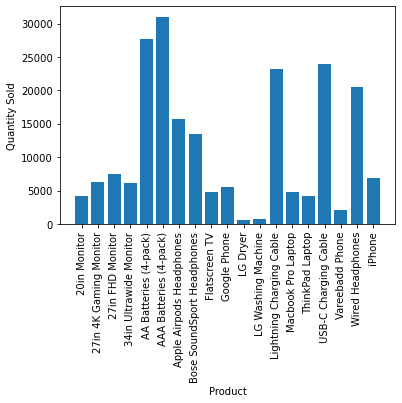

In [105]:
product=df['Product'].unique()
plt.bar(sorted(product), sold_most['Quantity Ordered'])
#city=[cit for cit, df in df.groupby('City')] //keith's way
#plt.bar(city, city_grouped['Sales']) // keith's way
plt.ylabel('Quantity Sold')
plt.xlabel('Product')
plt.xticks(product,rotation='vertical')
plt.show()

#### why did what sold the most sold the most?

<ipython-input-118-18a13a5458f1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product,rotation='vertical')


<function matplotlib.pyplot.show(close=None, block=None)>

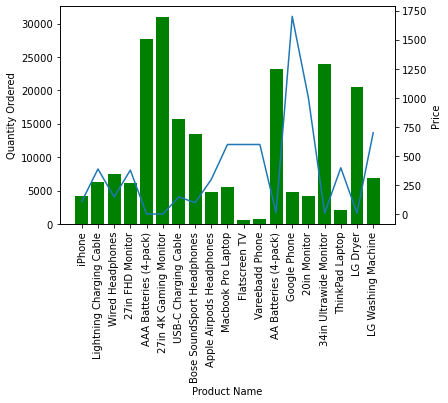

In [118]:
prices=df.groupby('Product').mean()['Price Each']
fig, ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(sorted(product), sold_most['Quantity Ordered'], color='g')
ax2.plot(sorted(product), prices)
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price')

ax1.set_xticklabels(product,rotation='vertical')

plt.show

What sales most is somehow correlated to the price.

#### The End